# Diferencias finitas: cálculo del error
**Objetivo general**
- Implementar varias fórmulas de aproximación de la primera derivada y compararlas entre ellas mediante el cálculo del error.

**Objetivos particulares**
- Revisar las fórmulas de aproximación de la primera derivada: Forward, Backward, Central.
- Implementar funciones para calcular las fórmulas.
- Calcular el error que introducen estas fórmulas.
- Mostrar de manera gráfica el error.
- Implementar funciones de varios órdenes para compararlas con las fórmulas anteriores.

## Contenido
- [1 - Introducción.](#1)
- [2 - Diferencias finitas hacia adelante (Forward).](#2)
- [3 - Diferencias finitas hacia atrás (Backward).](#3)
- [4 - Diferencias finitas centradas.](#4)
- [2 - La curva del olvido](#2)    
    - [2.1 - ¿Cuánto dura el recuerdo?.](#2-1)
    - [Ejercicio 1.](#ej-1)
- [3 - Definición de Derivada.](#3)
    - [Ejercicio 2.](#ej-2)


In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import macti.visual as mvis
from macti.evaluacion import Quizz
quizz = Quizz('Derivada', 'DerivadasNumericas')

<a name='1'></a>
## Introducción

La siguiente herramienta tiene como propósito mostras diferentes funciones y sus derivadas exactas así como el cálculo numérico de las derivadas usando varias aproximaciones. Puedes elegir la función y el tipo de aproximación. Después, puedes mover el punto donde se realiza la aproximación (punto azul) y el tamaño de la $h$.

In [52]:
%run "../utils/src/zinteractive1.ipynb"

interactive(children=(Dropdown(description='Función', options=(cos(x), sin(x), exp(x), exp(x)*cos(x), tan(x), …

<function FD.numericalDer(f, x0, h, aprox='All')>

<a name='2'></a>
## Diferencias finitas hacia adelante (Forward).

$
\displaystyle
\dfrac{\partial u(x)}{\partial x} \approx \lim\limits_{h\to 0} \frac{u(x+h) - u(x)}{h}
$

La siguiente función de Python implementa está formula.

In [53]:
def forwardFD(u,x,h):
    """ 
    Esquema de diferencias finitas hacia adelante.
    
    Parameters
    ----------
    u : función. 
    Función a evaluar.
    
    x : array
    Lugar(es) donde se evalúa la función
    
    h : array
    Tamaño(s) de la diferencia entre u(x+h) y u(x).
    
    Returns
    -------
    Cálculo de la derivada numérica hacia adelante.
    """
    return (u(x+h)-u(x))/h

Para probar la función `forwardFD` vamos a comparar su efectividad aproximando la derivada de $\sin(1.0)$. Esta aproximación será mejor cuando $h \to 0$. Entonces, vamos a definir el siguiente conjunto de valores: 

$$
\begin{eqnarray*}
H & = & \{h|h = \frac{1}{2^i} \; \text{para} \; i = 1,\dots,5 \} \\
  & = & \{1.0, 0.5, 0.25, 0.125, 0.0625, 0.03125 \}
\end{eqnarray*}
$$  

In [54]:
# Definimos un arreglo con diferentes tamaños de h:
N = 6
h = np.array([1 / 2**i for i in range(0,N)])

# Definimos un arreglo con valores de 1.0 (donde evaluaremos el cos(x)):
x = np.ones(N)

print(h)
print(x)

[1.      0.5     0.25    0.125   0.0625  0.03125]
[1. 1. 1. 1. 1. 1.]


Calculamos el error entre la derivada exacta, que este caso es $\cos(x)$, y la aproximación usando la fórmula:

$$
Error = || \cos(x) - D_+ \sin(x)||
$$

donde $D_+$ representa la aplicación de la fórmula hacia adelante.

In [55]:
# Calculamos el error entre la derivada exacta y la derivada numérica:
ef = np.fabs(np.cos(x) - forwardFD(np.sin, x, h) )

# Colocamos la información de h y del error en un Dataframe y mostramos el resultado:
Error = pd.DataFrame(np.array([h, ef]).T, 
                     columns=['$h$','$D_+$'])
Error

,$h$,$D_+$
0,1.00000,0.472476
1,0.50000,0.228254
2,0.25000,0.110248
3,0.12500,0.053929
4,0.06250,0.026639
5,0.03125,0.013235


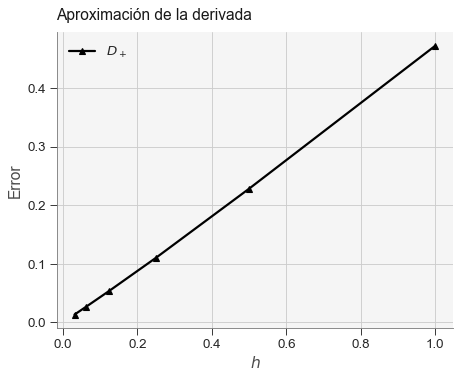

In [56]:
# Hacemos el gráfico del error vs h
plt.plot(h, ef, '^-', label='$D_+$')
plt.xlabel('$h$')
plt.ylabel('Error')
plt.title('Aproximación de la derivada')
plt.legend()
plt.show()

<a name='3'></a>
## Diferencias finitas hacia atrás (Backward).

$
\displaystyle
\frac{\partial u(x)}{\partial x} \approx \lim\limits_{h\to 0} \frac{u(x) - u(x-h)}{h}
$

La siguiente función de Python implementa está formula.

In [57]:
def backwardFD(u,x,h):
    """ 
    Esquema de diferencias finitas hacia atrás.
    
    Parameters
    ----------
    u : función. 
    Función a evaluar.
    
    x : array
    Lugar(es) donde se evalúa la función
    
    h : array
    Tamaño(s) de la diferencia entre u(x+h) y u(x).
    
    Returns
    -------
    Cálculo de la derivada numérica hacia atrás.
    """
    return (u(x)-u(x-h))/h

Calculamos el error entre la derivada exacta, que este caso es $\cos(x)$, y la aproximación usando la fórmula:

$$
Error = || \cos(x) - D_- \sin(x)||
$$

donde $D_-$ representa la aplicación de la fórmula hacia atrás.

---
<a name='ej-1'></a>
### **<font color="DodgerBlue">Ejercicio 1. Calcular el error para diferencias finitas hacia atrás.</font>**

<font color="DarkBlue">Tomando como base el ejemplo de diferencias finitas hacia adelante, completa el código que falta en la siguiente celda. </font>.

---

In [58]:
# Calculamos el error entre la derivada exacta y la derivada numérica:
### BEGIN SOLUTION
eb = np.fabs( np.cos(x) - backwardFD(np.sin,x,h) )
### END SOLUTION

In [59]:
quizz.verifica('1', '1', eb)

¡Tu resultado es correcto!


In [60]:
# Metemos la información de h y del error en un Dataframe y mostramos el resultado:
Error = pd.DataFrame(np.array([h, ef, eb]).T, 
                     columns=['$h$','$D_+$', '$D_-$'])
Error

,$h$,$D_+$,$D_-$
0,1.00000,0.472476,0.301169
1,0.50000,0.228254,0.183789
2,0.25000,0.110248,0.099027
3,0.12500,0.053929,0.051118
4,0.06250,0.026639,0.025936
5,0.03125,0.013235,0.013059


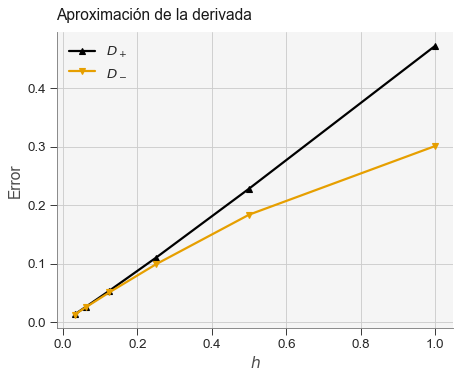

In [61]:
# Hacemos el gráfico del error vs h
plt.plot(h, ef, '^-', label='$D_+$')
plt.plot(h, eb, 'v-', label='$D_-$')
plt.xlabel('$h$')
plt.ylabel('Error')
plt.title('Aproximación de la derivada')
plt.legend()
plt.show()

<a name='4'></a>
## Diferencias finitas centradas.

$
\displaystyle
\frac{\partial u(x)}{\partial x} \approx \lim\limits_{h\to 0} \frac{u(x+h) - u(x-h)}{2h}
$

La siguiente función de Python implementa está formula.

In [62]:
def centeredFD(u,x,h):
    """ 
    Esquema de diferencias finitas centradas.
    
    Parameters
    ----------
    u : función. 
    Función a evaluar.
    
    x : array
    Lugar(es) donde se evalúa la función
    
    h : array
    Tamaño(s) de la diferencia entre u(x+h) y u(x).
    
    Returns
    -------
    Cálculo de la derivada numérica centrada.
    """
    return (u(x+h)-u(x-h))/(2*h)

In [63]:
# Calculamos el error entre la derivada exacta y la derivada numérica:
ec = np.fabs( np.cos(x) - centeredFD(np.sin,x,h) )

---
<a name='ej-2'></a>
### **<font color="DodgerBlue">Ejercicio 2. Agregar el error de diferencias finitas centradas al DataFrame.</font>**

<font color="DarkBlue">Tomando como base los ejemplos de diferencias finitas hacia adelante y hacia atrás, completa el código que falta en la siguiente celda. </font>.

---

In [64]:
# Metemos la información de h y del error en un Dataframe y mostramos el resultado:
### BEGIN SOLUTION
Error = pd.DataFrame(np.array([h,ef,eb,ec]).T, 
                     columns=['$h$','$D_+$', '$D_-$','$D_0$'])
### END SOLUTION
Error

,$h$,$D_+$,$D_-$,$D_0$
0,1.00000,0.472476,0.301169,0.085654
1,0.50000,0.228254,0.183789,0.022233
2,0.25000,0.110248,0.099027,0.005611
3,0.12500,0.053929,0.051118,0.001406
4,0.06250,0.026639,0.025936,0.000352
5,0.03125,0.013235,0.013059,0.000088


Observe que en este caso los errores son varios órdenes de magnitud más pequeños. Para hacer una gráfica más representativa usaremos escala `loglog`:

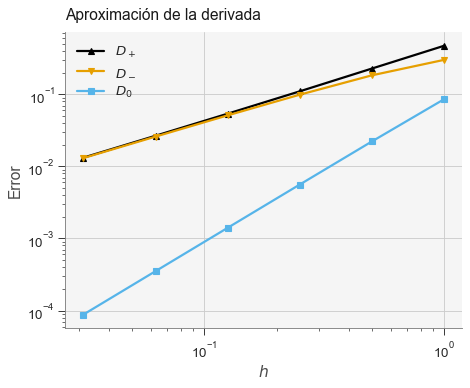

In [65]:
# Hacemos el gráfico del error vs h
plt.plot(h, ef, '^-', label='$D_+$')
plt.plot(h, eb, 'v-', label='$D_-$')
plt.plot(h, ec, 's-', label='$D_0$')
plt.xlabel('$h$')
plt.ylabel('Error')
plt.title('Aproximación de la derivada')
plt.legend()
plt.loglog()  # Definimos la escala log-log
plt.show()

Como se puede apreciar, la gráfica anterior muestra que la aproximación con diferencias finitas centradas es mejor, pues es de orden cuadrático.


---
<a name='ej-3'></a>
### **<font color="DodgerBlue">Ejercicio 3. Aproximación con cuatro puntos.</font>**

<font color="DarkBlue">
Implementar a siguiente fórmula de aproximación para el cálculo de la primera derivada y usarla 
para calcular la derivada del $\sin(x)$ en $x=1.0$ y compararla con las anteriores.
</font>.

$$
D_3 u = \dfrac{1}{6 h} 
\left[ 2u_{i+1} + 3u_{i} - 6u_{i-1} + u_{i-2} \right]
$$

---

**Hint**: Recuerde que $u_i = u(x)$, $u_{i+1} = u(x+h)$, $u_{i-1} = u(x-h)$ y $u_{i-2} = u(x-2h)$.

In [66]:
# Implementación de D3
def D3(u,x,h):
    ### BEGIN SOLUTION
    return (2*u(x+h)+3*u(x)-6*u(x-h)+u(x-2*h)) / (6*h)
    ### END SOLUTION

In [67]:
# Calculamos el error entre la derivada exacta y la derivada numérica:
e3 = np.fabs( np.cos(x) - D3(np.sin,x,h) )

In [68]:
quizz.verifica('1', '3', e3)

¡Tu resultado es correcto!


In [69]:
# Metemos la información de h y del error en un Dataframe y mostramos el resultado:
Error = pd.DataFrame(np.array([h,ef,eb,ec,e3]).T, 
                     columns=['$h$','$D_+$', '$D_-$','$D_0$','$D_3$'])
Error

,$h$,$D_+$,$D_-$,$D_0$,$D_3$
0,1.00000,0.472476,0.301169,0.085654,0.043287
1,0.50000,0.228254,0.183789,0.022233,0.007314
2,0.25000,0.110248,0.099027,0.005611,0.001014
3,0.12500,0.053929,0.051118,0.001406,0.000132
4,0.06250,0.026639,0.025936,0.000352,0.000017
5,0.03125,0.013235,0.013059,0.000088,0.000002


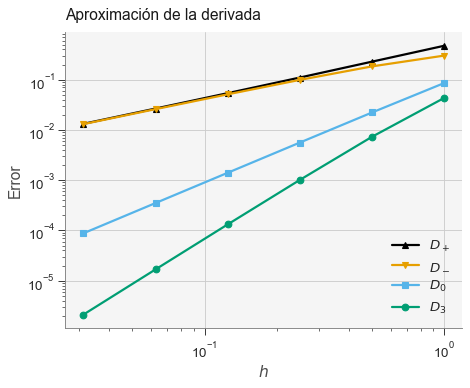

In [70]:
# Hacemos el gráfico del error vs h
plt.plot(h, ef, '^-', label='$D_+$')
plt.plot(h, eb, 'v-', label='$D_-$')
plt.plot(h, ec, 's-', label='$D_0$')
plt.plot(h, e3, 'o-', label='$D_3$')

plt.xlabel('$h$')
plt.ylabel('Error')
plt.title('Aproximación de la derivada')
plt.legend()
plt.loglog()  # Definimos la escala log-log
plt.show()


---
<a name='ej-4'></a>
### **<font color="DodgerBlue">Ejercicio 4. Aproximación con tres puntos (left).</font>**

<font color="DarkBlue">
Implementar a siguiente fórmula de aproximación para el cálculo de la primera derivada y usarla 
para calcular la derivada del $\sin(x)$ en $x=1.0$ y compararla con las anteriores.
</font>.

$$
D_{2l}f^\prime = \frac{3 f_i - 4 f_{i-1} + f_{i-2}}{2h}
$$

---


In [71]:
# Implementación
def D2l(u,x,h):
    ### BEGIN SOLUTION
    return (3*u(x) - 4*u(x-h) + u(x-2*h)) / (2*h)
    ### END SOLUTION

In [72]:
# Calculamos el error entre la derivada exacta y la derivada numérica:
e2l = np.fabs( np.cos(x) - D2l(np.sin,x,h) )

In [73]:
quizz.verifica('1','4',e2l)

¡Tu resultado es correcto!


In [74]:
# Metemos la información de h y del error en un Dataframe y mostramos el resultado:
Error = pd.DataFrame(np.array([h,ef,eb,ec,e3,e2l]).T, 
                     columns=['$h$','$D_+$', '$D_-$','$D_0$','$D_3$', '$D_{2l}$'])
Error

,$h$,$D_+$,$D_-$,$D_0$,$D_3$,$D_{2l}$
0,1.00000,0.472476,0.301169,0.085654,0.043287,0.301169
1,0.50000,0.228254,0.183789,0.022233,0.007314,0.066408
2,0.25000,0.110248,0.099027,0.005611,0.001014,0.014265
3,0.12500,0.053929,0.051118,0.001406,0.000132,0.003209
4,0.06250,0.026639,0.025936,0.000352,0.000017,0.000754
5,0.03125,0.013235,0.013059,0.000088,0.000002,0.000182


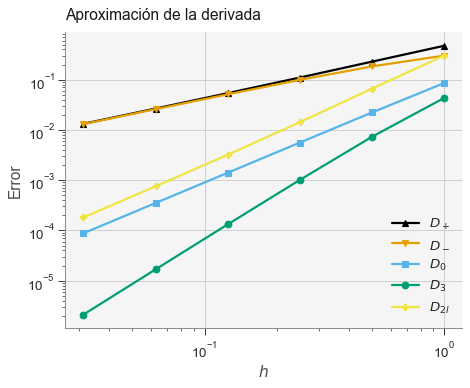

In [75]:
# Hacemos el gráfico del error vs h
plt.plot(h, ef, '^-', label='$D_+$')
plt.plot(h, eb, 'v-', label='$D_-$')
plt.plot(h, ec, 's-', label='$D_0$')
plt.plot(h, e3, 'o-', label='$D_3$')
plt.plot(h, e2l, 'P-', label='$D_{2l}$')

plt.xlabel('$h$')
plt.ylabel('Error')
plt.title('Aproximación de la derivada')
plt.legend()
plt.loglog()  # Definimos la escala log-log
plt.show()



¿Cuál de todas las aproximaciones usaría? ¿Por qué?




---
<a name='ej-5'></a>
### **<font color="DodgerBlue">Ejercicio 5. Aproximación con tres puntos (right).</font>**

<font color="DarkBlue">
Obtener los coeficientes $A$, $B$ y $C$ para una aproximación del siguiente tipo: 
</font>

$$
D_{2r} f^\prime = A f_i + B f_{i+1} + C f_{i+2}
$$

<font color="DarkBlue">
y luego implementar la fórmula y graficarla junto con los resultados anteriores.
</font>

---

Los coeficientes de la fórmula son: $A = -3 / 2h$, $B = 2/h$ y $C = -1/2h$ de tal manera que la fórmula de diferencias queda como sigue:

$$
f^\prime = \frac{-3 f_i + 4 f_{i+1} - f_{i+2}}{2h}
$$

In [76]:
# Implementación
def D2r(u,x,h):
    ### BEGIN SOLUTION
    return (-3*u(x) + 4*u(x+h) - u(x+2*h)) / (2*h)
    ### END SOLUTION

In [77]:
# Calculamos el error entre la derivada exacta y la derivada numérica:
e2r = np.fabs( np.cos(x) - D2r(np.sin,x,h) )

In [78]:
quizz.verifica('1','5',e2r)

¡Tu resultado es correcto!


In [79]:
# Calculamos el error entre la derivada exacta y la derivada numérica:
e2r = np.fabs( np.cos(x) - D2r(np.sin,x,h) )

# Metemos la información de h y del error en un Dataframe y mostramos el resultado:
Error = pd.DataFrame(np.array([h,ef,eb,ec,e3,e2l,e2r]).transpose(), 
                     columns=['$h$','$D_+$', '$D_-$','$D_0$','$D_3$', '$D_{2i}$', '$D_{2r}$'])
Error

,$h$,$D_+$,$D_-$,$D_0$,$D_3$,$D_{2i}$,$D_{2r}$
0,1.00000,0.472476,0.301169,0.085654,0.043287,0.301169,0.054474
1,0.50000,0.228254,0.183789,0.022233,0.007314,0.066408,0.015967
2,0.25000,0.110248,0.099027,0.005611,0.001014,0.014265,0.007759
3,0.12500,0.053929,0.051118,0.001406,0.000132,0.003209,0.002389
4,0.06250,0.026639,0.025936,0.000352,0.000017,0.000754,0.000651
5,0.03125,0.013235,0.013059,0.000088,0.000002,0.000182,0.000169


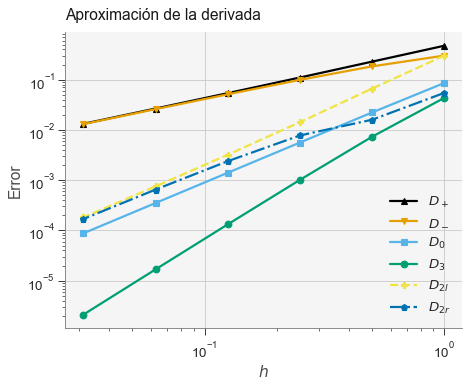

In [80]:
# Hacemos el gráfico del error vs h
plt.plot(h, ef, '^-', label='$D_+$')
plt.plot(h, eb, 'v-', label='$D_-$')
plt.plot(h, ec, 's-', label='$D_0$')
plt.plot(h, e3, 'o-', label='$D_3$')
plt.plot(h, e2l, 'P--', label='$D_{2l}$')
plt.plot(h, e2r, 'p-.', label='$D_{2r}$')

plt.xlabel('$h$')
plt.ylabel('Error')
plt.title('Aproximación de la derivada')
plt.legend()
plt.loglog()  # Definimos la escala log-log
plt.show()